## **Kütüphane Yükleme**

In [0]:
!pip install librosa

## **Ses dosyasını Yükleme**

In [21]:
import librosa
ses_dosyası="T08-violin.wav"
x, sr=librosa.load(ses_dosyası)
print(type(x),type(sr))
print(x.shape, sr)

#x -> ses zaman serisi
#sr -> sampling rate - KHz dönüşü

<class 'numpy.ndarray'> <class 'int'>
(396688,) 22050


**Ayarlama yapmadan sesi aldığımızda olarak 22KHz geliyor. Onu değiştirmek için;**

In [22]:
librosa.load(ses_dosyası,sr=44100) #44KHz olarak sesi yüklüyor.

(array([-0.0022583 , -0.00314331, -0.003479  , ...,  0.00091553,
         0.00091553,  0.00091553], dtype=float32), 44100)

## **Sesi Oynatmak**

[Ses Dosyasını Oynatma - Detay](https://ipython.org/ipython-doc/stable/api/generated/IPython.display.html#IPython.display.Audio)

In [13]:
import IPython.display as ipd
ipd.Audio(ses_dosyası)




![asd](https://cdn-images-1.medium.com/max/800/1*ktoXTt51zFSTMgiuv5ZCgg.png)

## **Sesi Görüntüleme**

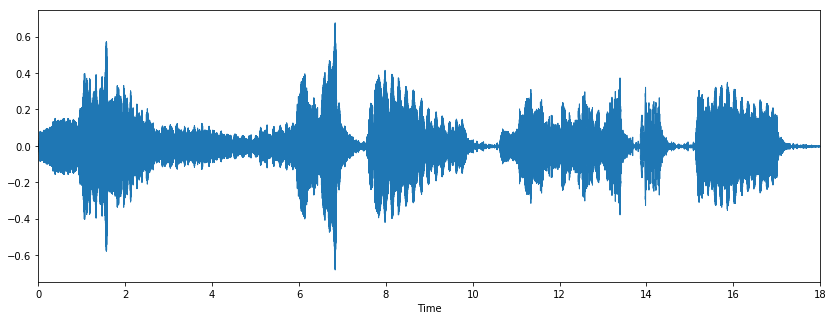

In [23]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(14,5))
librosa.display.waveplot(x,sr=sr)

### **Spectrogram**

[Spectogram için Eğlenceli Bir Site](https://musiclab.chromeexperiments.com/Spectrogram/)


---


[Specshow Kullanım Detay](https://librosa.github.io/librosa/generated/librosa.display.specshow.html)

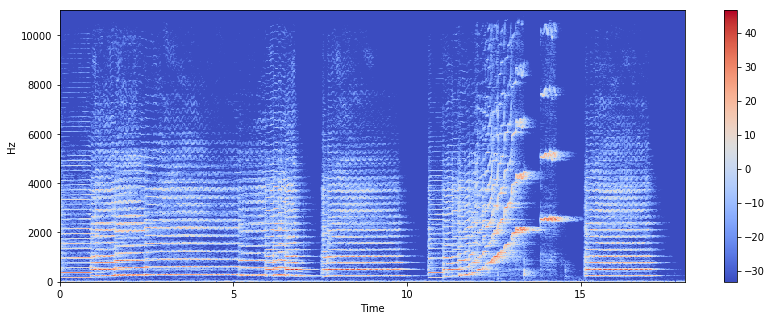

In [24]:
X=librosa.stft(x) #stft -> Short-time Fourier transform
Xdb=librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14,5))
librosa.display.specshow(Xdb,sr=sr,x_axis="time",y_axis="hz")
plt.colorbar()

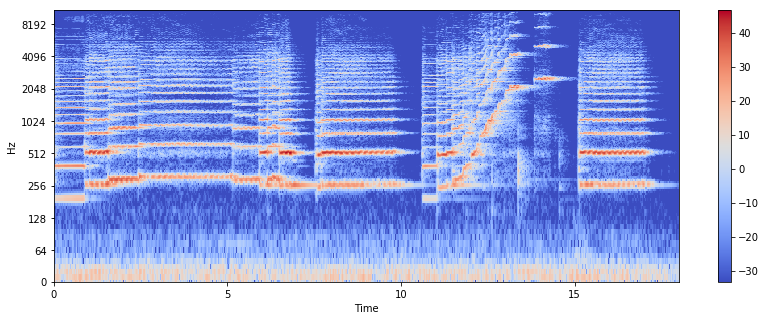

In [26]:
plt.figure(figsize=(14,5))
librosa.display.specshow(Xdb,sr=sr,x_axis="time",y_axis="log")
plt.colorbar()

## **Ses Yazma**

[librosa.output.write_wav](https://librosa.github.io/librosa/generated/librosa.output.write_wav.html) --> Numpy Array i Wav dosyasına çeviriyor.

In [0]:
import numpy as np
sr=22050 #KHz
T=5.0 #Saniye
t=np.linspace(0,T,int(T*sr),endpoint=False) #Zaman değişkeni
x=0.5*np.sin(2*np.pi*220*t) #Sinüs Dalgası

**Yazdığımız sesi Oynatalım**

In [43]:
ipd.Audio(x,rate=sr)

## **Sesi Kaydedelim**

In [0]:
librosa.output.write_wav('tone_220.wav', x, sr)

## **Feature Extraction - Özellik Çıkarımı**

### **Zero Crossing Rate**

Bir sinyal boyunca işaret değişim oranı. Sinyalin negatiften pozitife değiştiği oran. **Ses tanıma**(Speech recognition) ve **müzik bilgisi alımı**(music information retrieval)nda kullanılıyor.

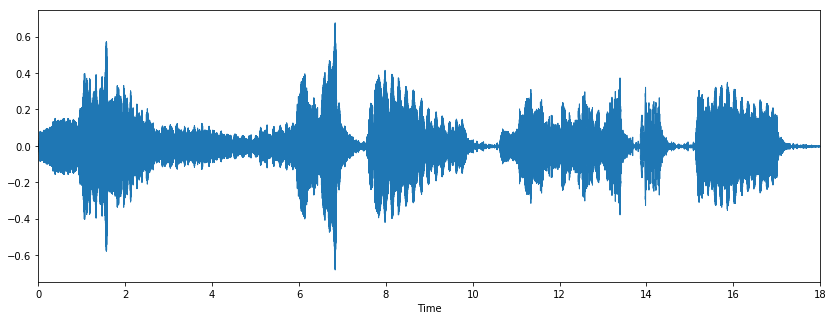

In [45]:
x,sr=librosa.load(ses_dosyası)
plt.figure(figsize=(14,5))
librosa.display.waveplot(x,sr=sr)

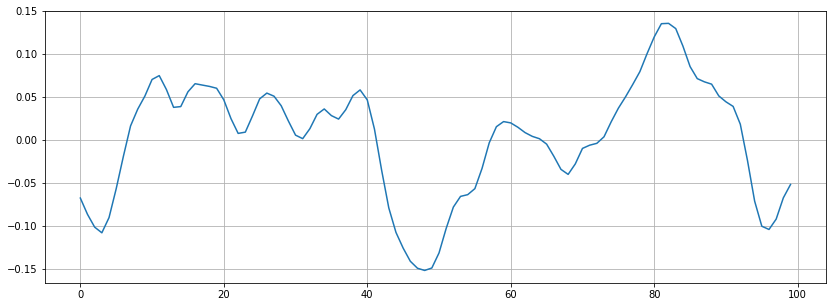

In [47]:
bas=9000
son=9100
plt.figure(figsize=(14, 5))
plt.plot(x[bas:son])
plt.grid()

**Librosa ile belirlediğimiz ses aralığı içerisinde kaç tane sıfır geçisi (zero crossing) olduğunu buluyoruz.**

In [90]:
zero_cross=librosa.zero_crossings(x[bas:son],pad=False)
zero_cross_tamamı=librosa.zero_crossings(x,pad=False)
print("Aralıkta: ",sum(zero_cross))
print("Tamamında:", sum(zero_cross_tamamı))

Aralıkta:  6
Tamamında: 32813


### **Spectral Centroid**

Bir spektrumun enerjisinin hangi frekansta merkezlendiğini gösterir.

In [65]:
spec_centroid=librosa.feature.spectral_centroid(x,sr=sr) #Bu şekilde 1 satır 775 sütundan oluşan np.array dönüyor.
spec_centroid=librosa.feature.spectral_centroid(x,sr=sr)[0] #1 sütun 775 satır oluyor.
spec_centroid.shape

(775,)

**Görselleştirme için Zaman değişkeni**

In [0]:
frames=range(len(spec_centroid))
t=librosa.frames_to_time(frames)

**Görselleştirme için Normalize Etme**

In [0]:
import sklearn
def normalize(x,axis=0):
  return sklearn.preprocessing.minmax_scale(x,axis=axis)

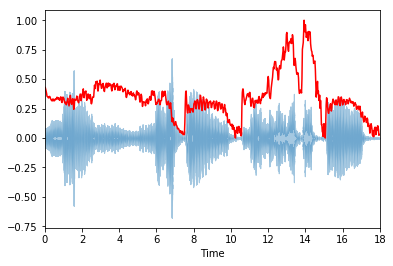

In [73]:
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spec_centroid), color='r')

### **Spectral Rolloff**

Sinyal şeklinin ölçüsü. Toplam spektral enerjisinin belli bir yüzdesini temsil eder.

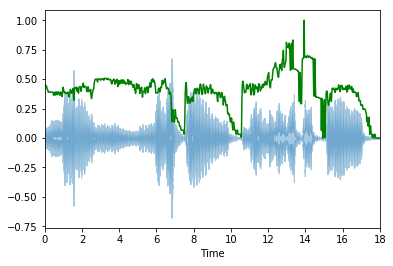

In [75]:
spec_rolloff=librosa.feature.spectral_rolloff(x+0.01,sr=sr)[0]
librosa.display.waveplot(x,sr=sr,alpha=0.4)
plt.plot(t,normalize(spec_rolloff),color="g")

### **Mel - Frekans Kepstral Katsayıları**(Mel-Frequency Cepstral Coefficients)

Spektral zarfın genel şekline açıkça tarif eder. Sesin öznitelik vektörünü elde etmek için kullanılır. [Mel_Frekans Kepstral Katsayıları](https://www.academia.edu/22318050/MEL-FREKANS_KEPSTRAL_KATSAYILARI_VE_DİNAMİK_ZAMAN_BÜKMESİ_YÖNTEMİ_KULLANILARAK_KONUŞMA-DIŞI_SESLERİN_TANINMASI_RECOGNITION_OF_NON-SPEECH_SOUNDS_USING_MEL-FREQUENCY_CEPSTRUM_COEFFICIENTS_AND_DYNAMIC_TIME_WARPING_METHOD)

In [76]:
mfkk=librosa.feature.mfcc(x,sr=sr)
mfkk.shape

(20, 775)

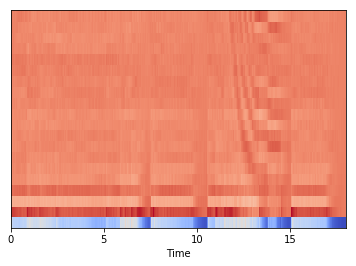

In [77]:
librosa.display.specshow(mfkk,sr=sr,x_axis="time")

**Ayrıca özellik oranlama yapabiliriz.**

[ 9.91321720e-17 -4.58414668e-18  1.41822038e-16 -9.36884978e-17
 -6.56105994e-17 -1.37810910e-16  4.41224118e-17 -3.66731735e-17
  8.62392595e-17  1.26064034e-17  3.23755359e-17  5.87343794e-18
  3.33425044e-17  7.36328561e-17  1.03214928e-16 -1.73911065e-16
 -1.50703822e-16 -2.92239351e-17  3.22322814e-17 -1.13171121e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


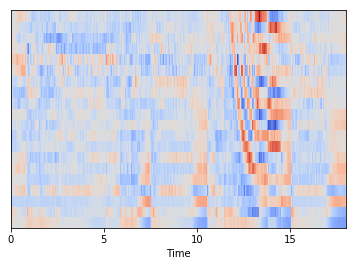

In [79]:
mfkk = sklearn.preprocessing.scale(mfkk, axis=1)
print(mfkk.mean(axis=1))
print(mfkk.var(axis=1))
librosa.display.specshow(mfkk, sr=sr, x_axis='time')

### **Chroma Frekansları**

Chroma:12 nota skalasındaki muhtemel tüm notaların zaman içindeki farklı noktalardaki gücünün oktav ölçüsü.

[chroma_stft - Detay](https://librosa.github.io/librosa/generated/librosa.feature.chroma_stft.html?highlight=chroma#librosa.feature.chroma_stft)

**librosa.feature.chroma_stft(y=None, sr=22050, S=None, norm=inf, n_fft=2048, hop_length=512, tuning=None, **kwargs)**

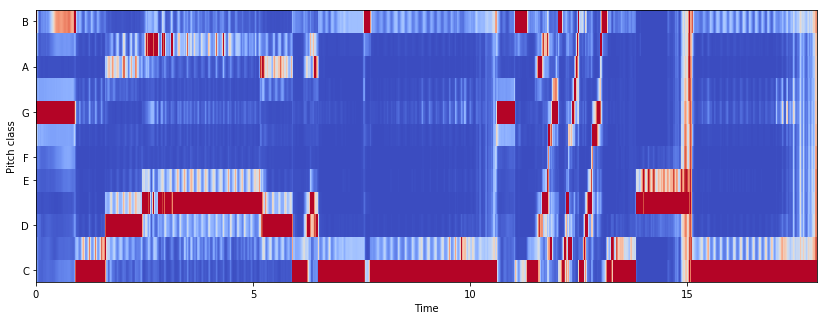

In [86]:
chroma=librosa.feature.chroma_stft(x,sr=sr,hop_length=512)
plt.figure(figsize=(14,5))
librosa.display.specshow(chroma,
                         x_axis="time",y_axis="chroma",
                         hop_length=512,
                         cmap="coolwarm")